# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%206-%20Deep%20Sequence%20Modeling/python/univariate_ts/Predictiong_stock_returns_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 

Here is the walkthrough video of this notebook on [![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://youtu.be/QcCDReclVu8?si=mKo0o99dYYrtjFlR)

## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Stock market price predictions

Note: working with latest data might generate different model ranking! your results might be different from the one from my video on YouTube! 

Can we predict stock market price with classical econometrics models or machine learning models?

Here is the detailed explanation: https://youtu.be/QcCDReclVu8

Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.net/en/stable/api_reference/forecasting.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install pycaret[full]

In [1]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.3.2'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Stock Dataset

In [3]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.722874  125.150002  80.229012  152.072800  243.072266   
2018-01-03  40.715786  124.820000  80.602394  153.550400  244.609711   
2018-01-04  40.904907  125.459999  81.311806  153.819046  245.640732   
2018-01-05  41.370617  125.330002  82.319908  155.363861  247.277679   
2018-01-08  41.216949  125.309998  82.403923  155.968399  247.729935   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [4]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
       '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype='object', name='Date', length=1509)

In [5]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
             '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
             '2023-12-28', '2023-12-29'],
            dtype='period[B]', name='Date', length=1509)

In [6]:
df = stocks['Adj Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,40.722874
2018-01-03,40.715786
2018-01-04,40.904907
2018-01-05,41.370617
2018-01-08,41.216949


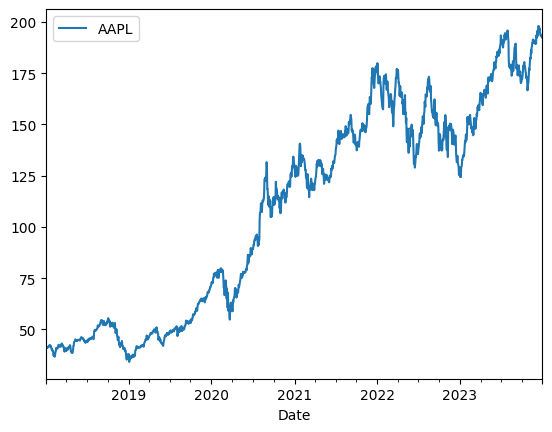

In [7]:
df.plot()
plt.show()

In [8]:
df.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
             '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
             '2023-12-28', '2023-12-29'],
            dtype='period[B]', name='Date', length=1509)

In [9]:
idx = pd.period_range(min(df.index), max(df.index))
idx

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-15',
             ...
             '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
             '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
             '2023-12-28', '2023-12-29'],
            dtype='period[B]', length=1564)

We need to make sure that data has not any missing indices, otherwise Pycaret will complain:

Data has missing indices!
Many models, plotting, and testing functionality does not work with missing indices. Please add missing indices to data before passing to pycaret.

In [10]:
df.index.symmetric_difference(idx)

PeriodIndex(['2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28',
             '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05',
             '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
             '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02',
             '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
             '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03',
             '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01',
             '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
             '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
             '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
             '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
             '2022-12-26', '2023-01-02', '2023-01-16', '2023-02-20',
             '2023-04-07', '2023-05-29', '2023-06-19', '2023-07-04',
             '2023-09-04', '2023-11-23', '2023-12-25'],
            dtype='period[B]')

In [11]:
df = df.reindex(idx, fill_value=np.nan)
df.tail()

,AAPL
2023-12-25,NaN
2023-12-26,193.050003
2023-12-27,193.149994
2023-12-28,193.580002
2023-12-29,192.529999


In [12]:
df = df.fillna(method = 'ffill')
df.tail(10)

,AAPL
2023-12-18,195.889999
2023-12-19,196.940002
2023-12-20,194.830002
2023-12-21,194.679993
2023-12-22,193.600006
2023-12-25,193.600006
2023-12-26,193.050003
2023-12-27,193.149994
2023-12-28,193.580002
2023-12-29,192.529999


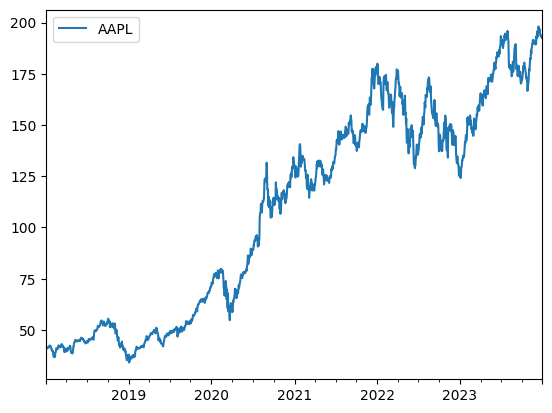

In [13]:
df.plot()
plt.show()

In [14]:
from pycaret.time_series import *

# Predicting Stock prices

In [15]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='AAPL' ,coverage=0.90, fh=1)

,Description,Value
0,session_id,1476
1,Target,AAPL
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1564, 1)"
5,Transformed data shape,"(1564, 1)"
6,Transformed train set shape,"(1563, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Let's see which one is the best model?

In [16]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [30]:
exp.compare_models(sort='mae', cross_validation=True) # exclude autoarima if you are running on a slower computer. 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
polytrend,Polynomial Trend Forecaster,0.0397,0.0297,0.1829,0.1829,0.0009,0.0009,0.5433
croston,Croston,0.0735,0.0551,0.3390,0.3390,0.0018,0.0018,0.0100
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0758,0.0568,0.3496,0.3496,0.0018,0.0018,0.1267
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0773,0.0580,0.3566,0.3566,0.0018,0.0018,0.1167
naive,Naive Forecaster,0.0781,0.0585,0.3600,0.3600,0.0019,0.0019,0.5433
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0978,0.0733,0.4507,0.4507,0.0023,0.0023,0.1200
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0978,0.0733,0.4508,0.4508,0.0023,0.0023,0.1200
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0983,0.0736,0.4530,0.4530,0.0023,0.0023,0.1167
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0985,0.0738,0.4541,0.4541,0.0024,0.0023,0.0533
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0989,0.0742,0.4561,0.4561,0.0024,0.0024,0.1267


PolynomialTrendForecaster()

In [ ]:
# the wining model might change for different time periods. Here we go with arima. 
wining = exp.create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2023-12-25,0.8736,0.6547,4.0274,4.0274,0.0209,0.0206
1,2023-12-26,0.1532,0.1148,0.7063,0.7063,0.0037,0.0037
2,2023-12-27,0.0670,0.0502,0.3089,0.3089,0.0016,0.0016
Mean,NaT,0.3646,0.2732,1.6809,1.6809,0.0087,0.0086
SD,NaT,0.3617,0.2710,1.6672,1.6672,0.0086,0.0085


In [32]:
final_model = exp.finalize_model(wining)

In [33]:
unseen_predictions = exp.predict_model(final_model, fh=10)
unseen_predictions

,y_pred
2024-01-01,194.0598
2024-01-02,192.3752
2024-01-03,192.6022
2024-01-04,191.8564
2024-01-05,192.1526
2024-01-08,191.8652
2024-01-09,192.1980
2024-01-10,192.8343
2024-01-11,191.9672
2024-01-12,193.6591


In [34]:
exp.plot_model(final_model  , plot='insample')

In [35]:
exp.plot_model(final_model  , plot='forecast', data_kwargs={'fh':20})

# Predicting Stock Returns

In [36]:
df['LogAAPL']= np.log(df['AAPL'])
df['DiffLogAAPL']= df['LogAAPL'].diff(1)
df.dropna(inplace=True)
df.drop(['AAPL','LogAAPL'], axis=1, inplace=True)
df.head()

,DiffLogAAPL
2018-01-03,-0.000174
2018-01-04,0.004634
2018-01-05,0.011321
2018-01-08,-0.003721
2018-01-09,-0.000114


In [37]:
exp1 = TSForecastingExperiment()
exp1.setup(data = df, target='DiffLogAAPL' ,coverage=0.90, fh=1)

,Description,Value
0,session_id,4298
1,Target,DiffLogAAPL
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1563, 1)"
5,Transformed data shape,"(1563, 1)"
6,Transformed train set shape,"(1562, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [40]:
exp1.compare_models()#exclude='auto_arima'#)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
polytrend,Polynomial Trend Forecaster,0.0917,0.0675,0.0018,0.0018,0.7885,1.1188,0.0100
theta,Theta Forecaster,0.0917,0.0675,0.0018,0.0018,0.7885,1.1188,0.0133
grand_means,Grand Means Forecaster,0.0960,0.0707,0.0019,0.0019,0.9432,1.1316,0.0100
naive,Naive Forecaster,0.1368,0.1007,0.0026,0.0026,2.7538,1.7482,0.0100
auto_arima,Auto ARIMA,0.1409,0.1037,0.0027,0.0027,1.5124,1.3379,3.3700
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.1636,0.1204,0.0032,0.0032,2.3843,1.3325,0.0200
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.1650,0.1215,0.0032,0.0032,2.5012,1.4160,0.0200
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.1698,0.1250,0.0033,0.0033,2.8464,1.7586,0.0200
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.1737,0.1279,0.0033,0.0033,2.8479,1.4724,0.1333
exp_smooth,Exponential Smoothing,0.1749,0.1288,0.0034,0.0034,3.1494,1.8495,0.0500


PolynomialTrendForecaster()

In [47]:
arima = exp1.create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2023-12-25,1.0190,0.7503,0.0197,0.0197,6.9078,2.0000
1,2023-12-26,0.0457,0.0337,0.0009,0.0009,1.7023,0.9196
2,2023-12-27,0.2584,0.1903,0.0050,0.0050,2.2398,2.0000
Mean,NaT,0.4411,0.3248,0.0085,0.0085,3.6167,1.6399
SD,NaT,0.4178,0.3076,0.0081,0.0081,2.3375,0.5093


In [48]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1562
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 9)   Log Likelihood                3455.048
Date:                           Wed, 20 Nov 2024   AIC                          -6904.096
Time:                                   12:20:50   BIC                          -6888.052
Sample:                               01-03-2018   HQIC                         -6898.130
                                    - 12-28-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.289e-05      0.001     -0.050      0.960      -0.001       0.001
ar.L1         -0.0349      0.019     -1.823      0.068      -0.072       0.003
sigma2         0.0007   1.67e-05     40.968      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               352.60
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.00
Prob(H) (two-sided):                  0.88   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
final_model = exp1.finalize_model(arima)

In [50]:
unseen_predictions = exp1.predict_model(final_model, fh=10)
unseen_predictions

,y_pred
2024-01-01,0.0052
2024-01-02,-0.0108
2024-01-03,-0.0008
2024-01-04,-0.0056
2024-01-05,-0.0000
2024-01-08,-0.0029
2024-01-09,0.0005
2024-01-10,0.0022
2024-01-11,-0.0055
2024-01-12,0.0052


In [51]:
exp1.plot_model(final_model  , plot='insample')

In [52]:
exp1.plot_model(final_model  , plot='forecast', data_kwargs={'fh':30})